<ipython-input-2-8809fd51dc7d>:34: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.plot(Xt[0][:], Xt[1][:],'.',Color='k')


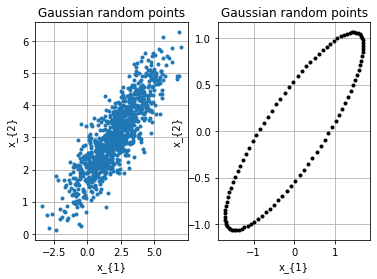

In [2]:
import numpy as np
import matplotlib.pyplot as plt

xC = np.array([[2],[3]])
sig = np.array([2,0.5])

angle = np.pi/6

Rot = np.array([[np.cos(angle), -np.sin(angle)],
                [np.sin(angle),  np.cos(angle)]])
nPoints = 1000
X = Rot@np.diag(sig)@np.random.randn(2,nPoints) + np.tile(xC,(1,nPoints))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0][:], X[1][:],'.')
ax1.grid()
ax1.set(xlabel='x_{1}', ylabel='x_{2}',
       title='Gaussian random points')

Xavg= np.mean(X,axis=1)
Xcenter = X - np.tile(Xavg,(nPoints,1)).T
Xstd = Xcenter/np.sqrt(nPoints)

U, S, Vt = np.linalg.svd(Xstd,full_matrices=True)
S= np.diag(S)

theta = 2* np.pi* np.arange(0,1,0.01)
unit_circle = np.stack((np.cos(theta),np.sin(theta)))
Xt = U @ S @ unit_circle

#fig, ax2 = plt.subplots()
ax2 = fig.add_subplot(122)
ax2.plot(Xt[0][:], Xt[1][:],'.',Color='k')
ax2.set(xlabel='x_{1}', ylabel='x_{2}',
       title='Gaussian random points')
ax2.grid()
plt.show()